In [482]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys


In [483]:
# reading the file...

df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

df.head()

df.dropna()



,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [484]:
print("Clustering method to be used as it will help group customerv (by FICO score) into defaults and no defaults")

Clustering method to be used as it will help group customerv (by FICO score) into defaults and no defaults


In [485]:
# defining X and y variables
X = df['fico_score'].values
X = X.reshape(-1,1)
y = df['default'].values

In [486]:
print("Since the requirement of the task is to find a general approach to generating buckets, large datasets ")
print ("Agglomerative clustering will be used as it will automatically create boundaries and thresholds, and will help grouping based on FICO scores")

Since the requirement of the task is to find a general approach to generating buckets, large datasets 
Agglomerative clustering will be used as it will automatically create boundaries and thresholds, and will help grouping based on FICO scores


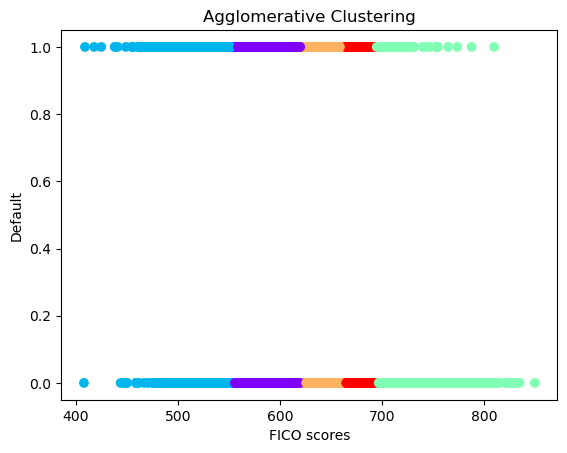

In [487]:
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

model_cluster = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

y_cluster = model_cluster.fit_predict(X)

z = df['income'].values

plt.scatter(X, y, c = y_cluster, cmap = "rainbow")

plt.xlabel('FICO scores')
plt.ylabel('Default')
plt.title("Agglomerative Clustering")
plt.show()

In [488]:
#VISUALIZATION
print("The above visualization has automatically created buckets for FICO scores")
print("approximate groupings: FICO scores <550 (bucket 1), 550<FICO score<625 (bucket 2), 625<FICO score< 675 (bucket 3), 675<FICO<700 (bucket4)")
print("finally: FICO score > 700 (bucket 5)")

The above visualization has automatically created buckets for FICO scores
approximate groupings: FICO scores <550 (bucket 1), 550<FICO score<625 (bucket 2), 625<FICO score< 675 (bucket 3), 675<FICO<700 (bucket4)
finally: FICO score > 700 (bucket 5)


In [489]:
#CONCLUSION
print("The above visualization indicates that customers whose FICO score <550 are more likely to default on loan")
print("And customers whose FICO score >700 are less likely to default")

The above visualization indicates that customers whose FICO score <550 are more likely to default on loan
And customers whose FICO score >700 are less likely to default
